In [17]:
!pip install soundfile

In [20]:
!pip install pydub


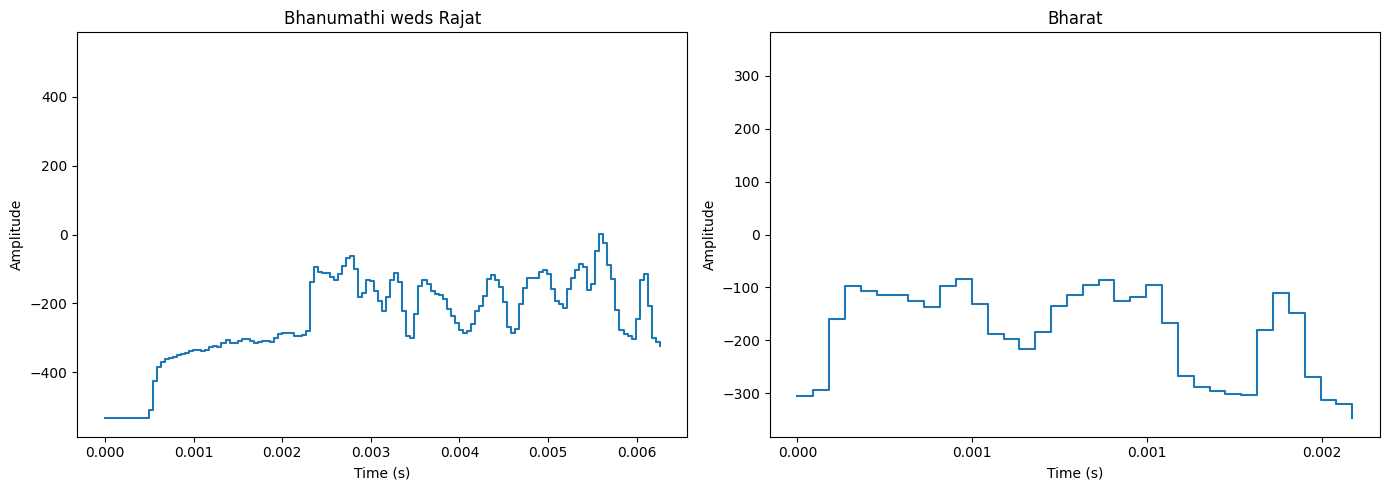

In [29]:
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt


def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature

# Load data
bhanumathi_weds_rajat_features = extract_features('bhanumatiwedsrajat.wav')
bharat_features = extract_features('merged_audio.wav')

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=bhanumathi_weds_rajat_features.shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr

# Load data and extract features
bhanumathi_weds_rajat_features, sr1 = extract_features('bhanumatiwedsrajat.wav')
bharat_features, sr2 = extract_features('merged_audio.wav')

# Plot the signals
plt.figure(figsize=(14, 5))

# Plot Bhanumathi weds Rajat
plt.subplot(1, 2, 1)
librosa.display.waveshow(bhanumathi_weds_rajat_features, sr=sr1)
plt.title('Bhanumathi weds Rajat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot Bharat
plt.subplot(1, 2, 2)
librosa.display.waveshow(bharat_features, sr=sr2)
plt.title('Bharat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()





In [22]:
import librosa
import numpy as np
import IPython.display as ipd
from IPython.display import Audio, display
import soundfile as sf
from pydub import AudioSegment

# Load the audio file
audio =  r"/content/bhanumatiwedsrajat.wav"
y, sr = librosa.load(audio)
Audio("bhanumatiwedsrajat.wav")
bha=y[25000:30000]
ra=y[56000:62000]
th=y[64000:71000]

bha_file = "bha.wav"
ra_file = "ra.wav"
th_file = "th.wav"

sf.write(bha_file, bha, sr)
sf.write(ra_file, ra, sr)
sf.write(th_file, th, sr)

print("Segmented audio files saved as 'bha.wav', 'ra.wav', and 'th.wav'")


bha = AudioSegment.from_file("bha.wav")
ra = AudioSegment.from_file("ra.wav")
th = AudioSegment.from_file("th.wav")

# Concatenate the audio segments
merged_audio = bha + ra + th

# Export the merged audio to a file
merged_audio.export("merged_audio.wav", format="wav")

print("Merged audio saved as 'merged_audio.wav'")
audio1 = r"/content/merged_audio.wav"
Audio(audio1, rate = sr)

Segmented audio files saved as 'bha.wav', 'ra.wav', and 'th.wav'
Merged audio saved as 'merged_audio.wav'
